## Machine Learning: Introdução a algoritmos não supervisionados k-Means

https://cursos.alura.com.br/course/machine-learning-algoritmos-nao-supervisionados/task/49491

In [2]:
!pip install seaborn==0.9.0

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd

In [4]:

uri_filmes = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'

filmes = pd.read_csv(uri_filmes)

filmes.columns = ['filme_id', 'titulo', 'generos']

filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
generos = filmes.generos.str.get_dummies()

dados_dos_filmes = pd.concat([filmes, generos], axis=1)
dados_dos_filmes.head(5)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Escalando dados com StandardScaler

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)

generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

## Importando algoritmos k-Means

In [13]:
from sklearn.cluster import KMeans

In [16]:
modelo = KMeans(n_clusters=3)

modelo.fit(generos_escalados)

print(f'Grupos {modelo.labels_}')

Grupos [1 1 0 ... 0 1 0]


In [17]:
print(generos.columns)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')


In [18]:
print(modelo.cluster_centers_)

[[ 0.03984634 -0.40317819 -0.2662971  -0.2523033  -0.26908813  0.23903115
  -0.18850383  0.14230188  0.15260291 -0.16372553 -0.07666818 -0.14430013
  -0.11343931  0.02869207 -0.18428413  0.21588761 -0.22822261 -0.47780445
   0.01832653  0.03334335]
 [-0.05917995  0.12521866  1.10933211  1.94480583  2.12120532  0.16103537
  -0.3218147  -0.19989888 -0.59904787  1.2001225  -0.09492563 -0.27631651
   0.2981668   0.31347518 -0.14130534 -0.27238059  0.14223653 -0.47049038
  -0.17378941 -0.08985123]
 [-0.05917995  0.78236778  0.11881878 -0.23385932 -0.26764204 -0.55503473
   0.51322351 -0.21578487 -0.08229972 -0.12776075  0.19479848  0.40448918
   0.11821276 -0.18063737  0.43455985 -0.33934191  0.41520816  1.16706707
   0.02959374 -0.03388951]]


In [19]:
grupos = pd.DataFrame(modelo.cluster_centers_, 
            columns=generos.columns)

grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.039846,-0.403178,-0.266297,-0.252303,-0.269088,0.239031,-0.188504,0.142302,0.152603,-0.163726,-0.076668,-0.144300,-0.113439,0.028692,-0.184284,0.215888,-0.228223,-0.477804,0.018327,0.033343
1,-0.059180,0.125219,1.109332,1.944806,2.121205,0.161035,-0.321815,-0.199899,-0.599048,1.200123,-0.094926,-0.276317,0.298167,0.313475,-0.141305,-0.272381,0.142237,-0.470490,-0.173789,-0.089851
2,-0.059180,0.782368,0.118819,-0.233859,-0.267642,-0.555035,0.513224,-0.215785,-0.082300,-0.127761,0.194798,0.404489,0.118213,-0.180637,0.434560,-0.339342,0.415208,1.167067,0.029594,-0.033890


array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>,
       <AxesSubplot:title={'center':'2'}>], dtype=object)

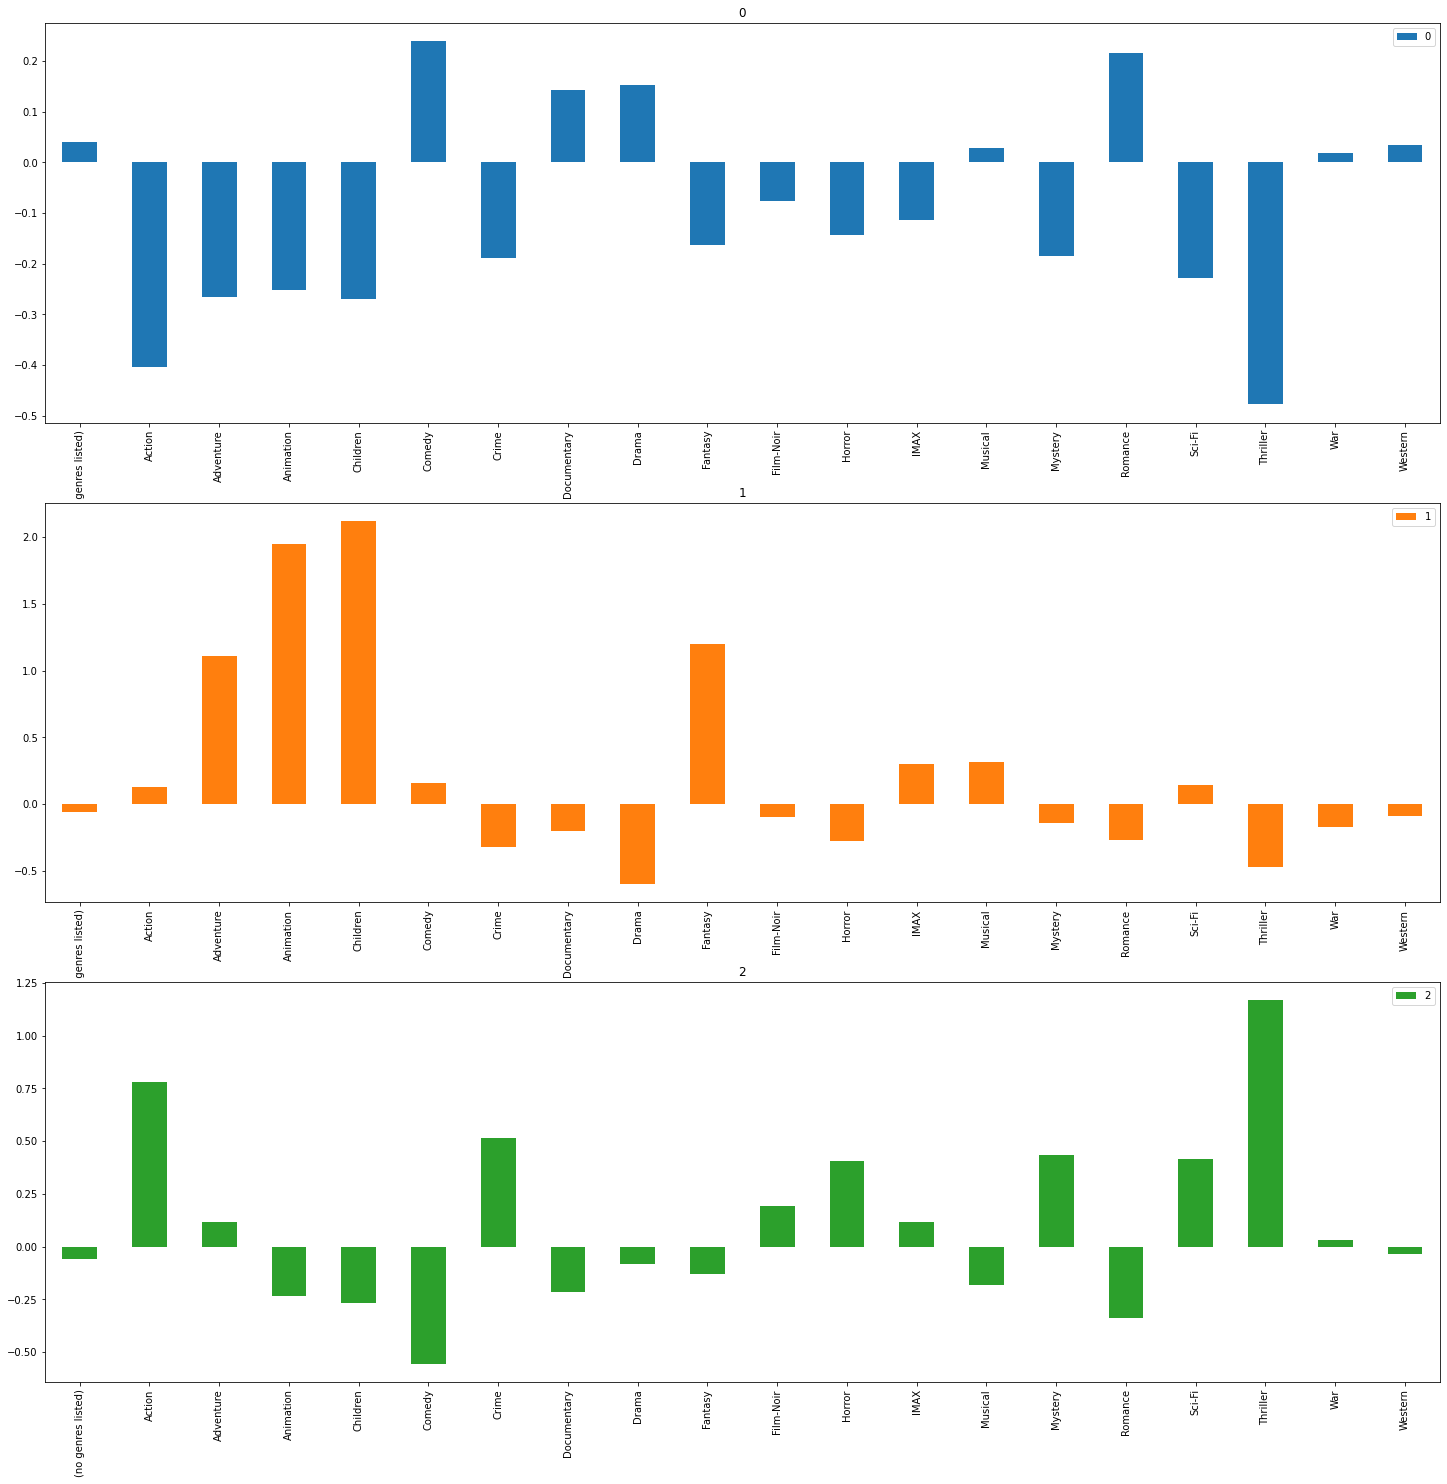

In [20]:
grupos.transpose().plot.bar(subplots=True,
                figsize=(25, 25),
                sharex=False)

In [21]:
grupo = 0

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
265,305,Ready to Wear (Pret-A-Porter) (1994),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7053,69304,Imagine That (2009),Comedy|Drama|Fantasy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1229,1633,Ulee's Gold (1997),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5460,26147,"Thousand Clowns, A (1965)",Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1001,1303,"Man Who Would Be King, The (1975)",Adventure|Drama,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8267,105246,Mood Indigo (L'écume des jours) (2013),Drama|Fantasy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5144,8264,Grey Gardens (1975),Documentary,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2341,3099,Shampoo (1975),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8437,111743,A Million Ways to Die in the West (2014),Comedy|Western,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
823,1083,"Great Race, The (1965)",Comedy|Musical,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [24]:
from sklearn.manifold import TSNE

In [25]:
tsne = TSNE()

visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[ 36.158146 , -50.43685  ],
       [-43.836212 ,  26.271023 ],
       [-15.106301 ,  18.424006 ],
       ...,
       [ 22.147911 ,   3.0140145],
       [-42.25822  , -18.289091 ],
       [-20.59844  ,  -5.5314927]], dtype=float32)

<AxesSubplot:>

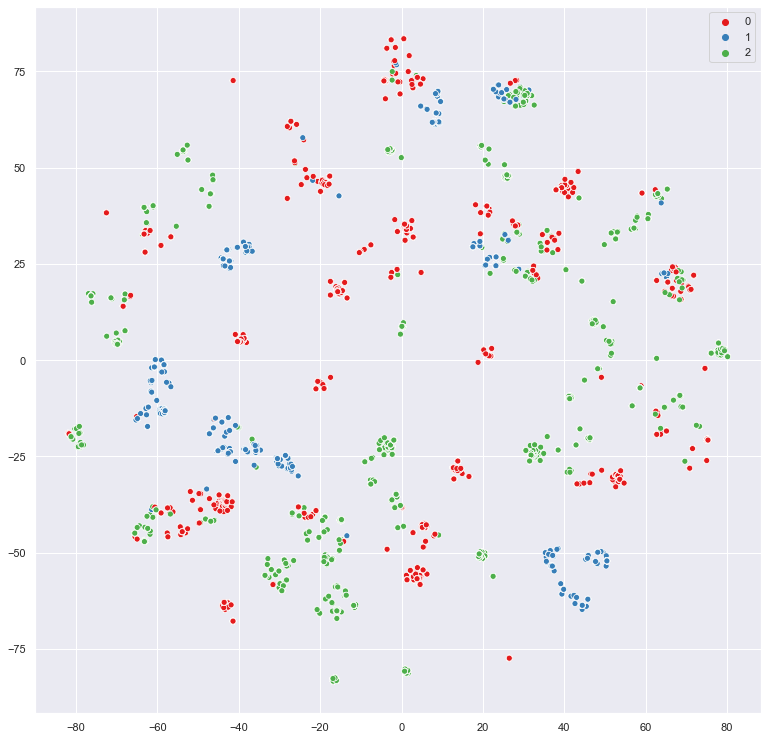

In [27]:
import seaborn as sns

sns.set(rc={'figure.figsize':(13, 13)})

sns.scatterplot(x=visualizacao[:,0],
               y=visualizacao[:, 1],
               hue=modelo.labels_,
               palette=sns.color_palette("Set1", 3))

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>,
       <AxesSubplot:title={'center':'2'}>,
       <AxesSubplot:title={'center':'3'}>,
       <AxesSubplot:title={'center':'4'}>,
       <AxesSubplot:title={'center':'5'}>,
       <AxesSubplot:title={'center':'6'}>,
       <AxesSubplot:title={'center':'7'}>,
       <AxesSubplot:title={'center':'8'}>,
       <AxesSubplot:title={'center':'9'}>,
       <AxesSubplot:title={'center':'10'}>,
       <AxesSubplot:title={'center':'11'}>,
       <AxesSubplot:title={'center':'12'}>,
       <AxesSubplot:title={'center':'13'}>,
       <AxesSubplot:title={'center':'14'}>,
       <AxesSubplot:title={'center':'15'}>,
       <AxesSubplot:title={'center':'16'}>,
       <AxesSubplot:title={'center':'17'}>,
       <AxesSubplot:title={'center':'18'}>,
       <AxesSubplot:title={'center':'19'}>], dtype=object)

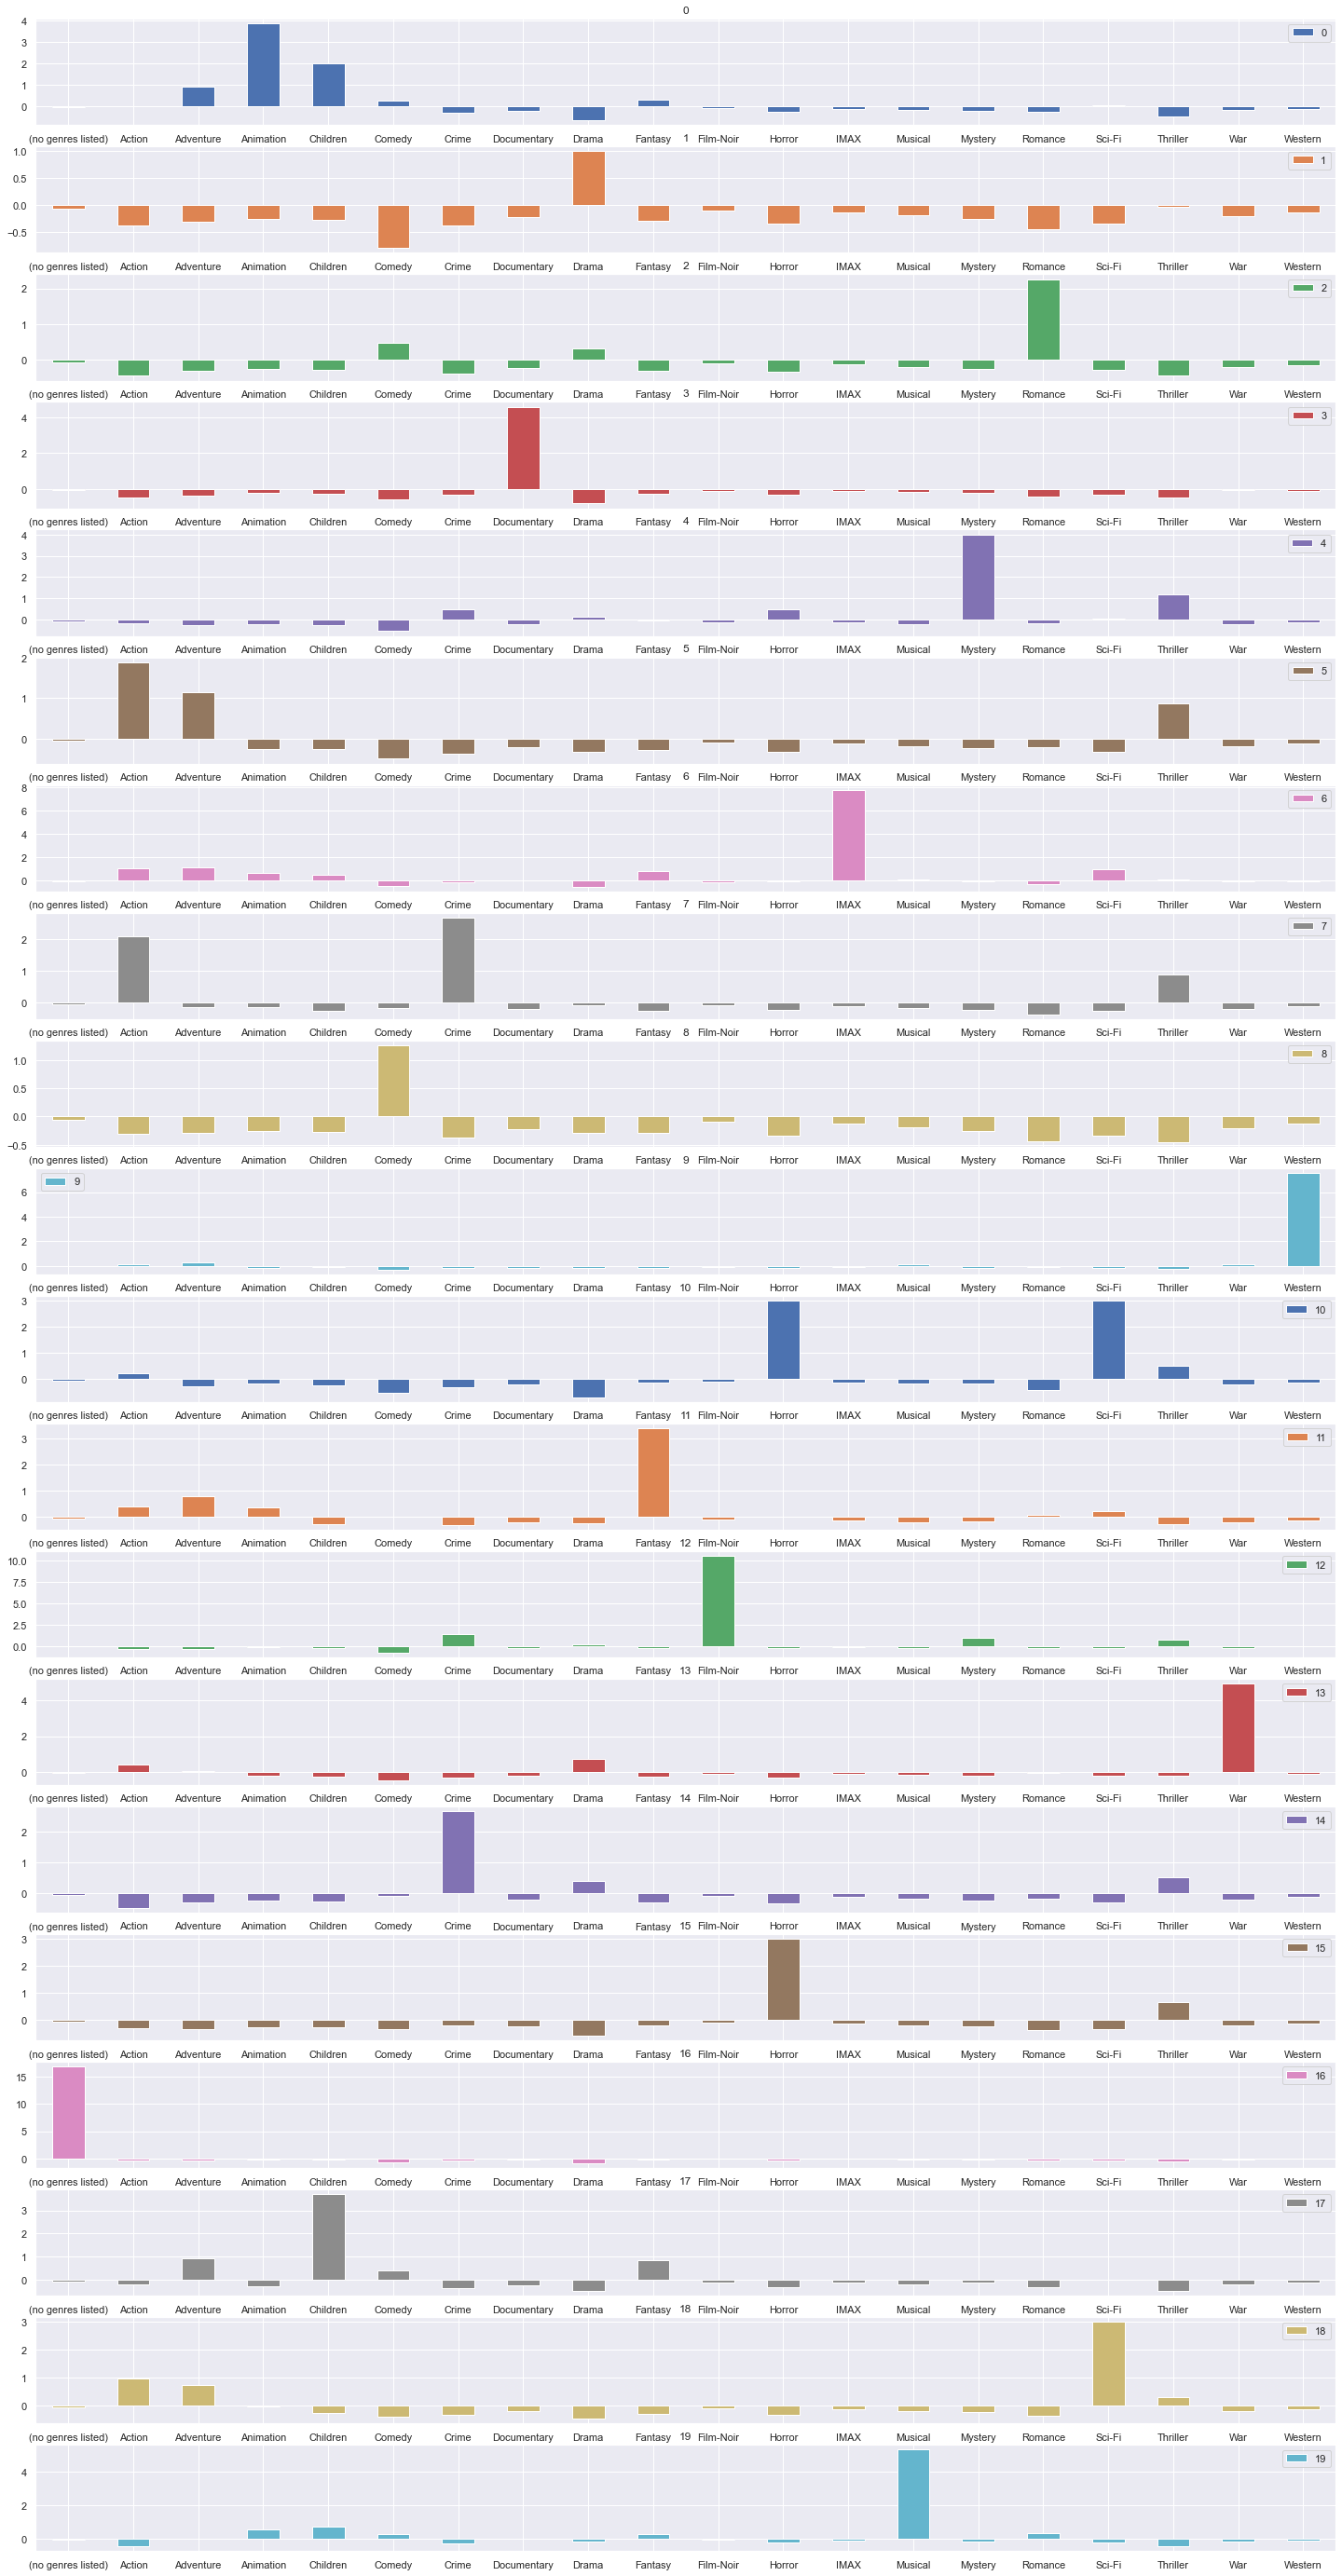

In [28]:
modelo = KMeans(n_clusters=20)

modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_, 
                    columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
                figsize=(25, 50),
                sharex=False,
                rot=0)

In [30]:
grupo = 2

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1269,1684,Mrs. Dalloway (1997),Drama|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1140,1493,Love and Other Catastrophes (1996),Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1771,2369,Desperately Seeking Susan (1985),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1169,1550,Trial and Error (1997),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
7390,79590,"Rebound, The (2009)",Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1378,1888,Hope Floats (1998),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
317,359,I Like It Like That (1994),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
570,697,Feeling Minnesota (1996),Drama|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7163,71823,"New York, I Love You (2009)",Drama|Romance,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
482,550,Threesome (1994),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [31]:
def kmeans(numero_de_clusters, generos):
    modelo = KMeans(n_clusters=numero_de_clusters)
    modelo.fit(generos)
    return[numero_de_clusters, modelo.inertia_]

In [32]:
kmeans(20, generos_escalados)

[20, 55269.817340171365]

In [33]:
kmeans(3, generos_escalados)

[3, 166263.56920393874]

In [35]:
resultado = [kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1, 41)]
resultado

[[1, 194839.9999999991],
 [2, 179665.64453856353],
 [3, 166558.34474828155],
 [4, 158400.91016537842],
 [5, 146164.8131616169],
 [6, 138706.12393922982],
 [7, 129053.59010226975],
 [8, 119152.09709426956],
 [9, 109163.73762894972],
 [10, 103692.79186594002],
 [11, 93243.0622612429],
 [12, 86084.38573307892],
 [13, 79561.84545936434],
 [14, 71749.41145593033],
 [15, 70029.6196255663],
 [16, 63673.35994723183],
 [17, 60353.15737793728],
 [18, 59212.57261511884],
 [19, 56425.59640983968],
 [20, 55685.14358020599],
 [21, 53776.50114117828],
 [22, 52317.42107125742],
 [23, 50711.495695743506],
 [24, 49329.96083373774],
 [25, 48793.3995561981],
 [26, 46536.174769721314],
 [27, 45286.8435413582],
 [28, 45301.24724531473],
 [29, 43695.66630673641],
 [30, 42735.18856197835],
 [31, 41667.30078228004],
 [32, 41510.34401468486],
 [33, 39770.33361922477],
 [34, 39617.81609301609],
 [35, 39045.90123347773],
 [36, 37040.556058445356],
 [37, 37298.923237616764],
 [38, 36883.57408685207],
 [39, 35840.8

In [36]:
resultado = pd.DataFrame(resultado, 
             columns=['grupos', 'inertia'])
resultado

,grupos,inertia
0,1,194840.000000
1,2,179665.644539
2,3,166558.344748
3,4,158400.910165
4,5,146164.813162
5,6,138706.123939
6,7,129053.590102
7,8,119152.097094
8,9,109163.737629
9,10,103692.791866


<AxesSubplot:>

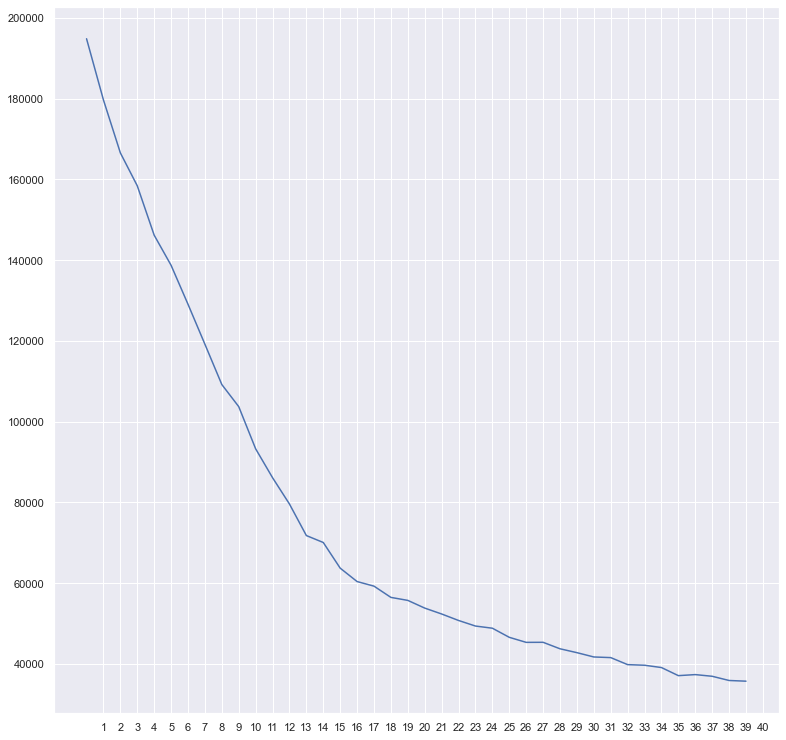

In [37]:
resultado.inertia.plot(xticks=resultado.grupos)

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>,
       <AxesSubplot:title={'center':'2'}>,
       <AxesSubplot:title={'center':'3'}>,
       <AxesSubplot:title={'center':'4'}>,
       <AxesSubplot:title={'center':'5'}>,
       <AxesSubplot:title={'center':'6'}>,
       <AxesSubplot:title={'center':'7'}>,
       <AxesSubplot:title={'center':'8'}>,
       <AxesSubplot:title={'center':'9'}>,
       <AxesSubplot:title={'center':'10'}>,
       <AxesSubplot:title={'center':'11'}>,
       <AxesSubplot:title={'center':'12'}>,
       <AxesSubplot:title={'center':'13'}>,
       <AxesSubplot:title={'center':'14'}>,
       <AxesSubplot:title={'center':'15'}>,
       <AxesSubplot:title={'center':'16'}>], dtype=object)

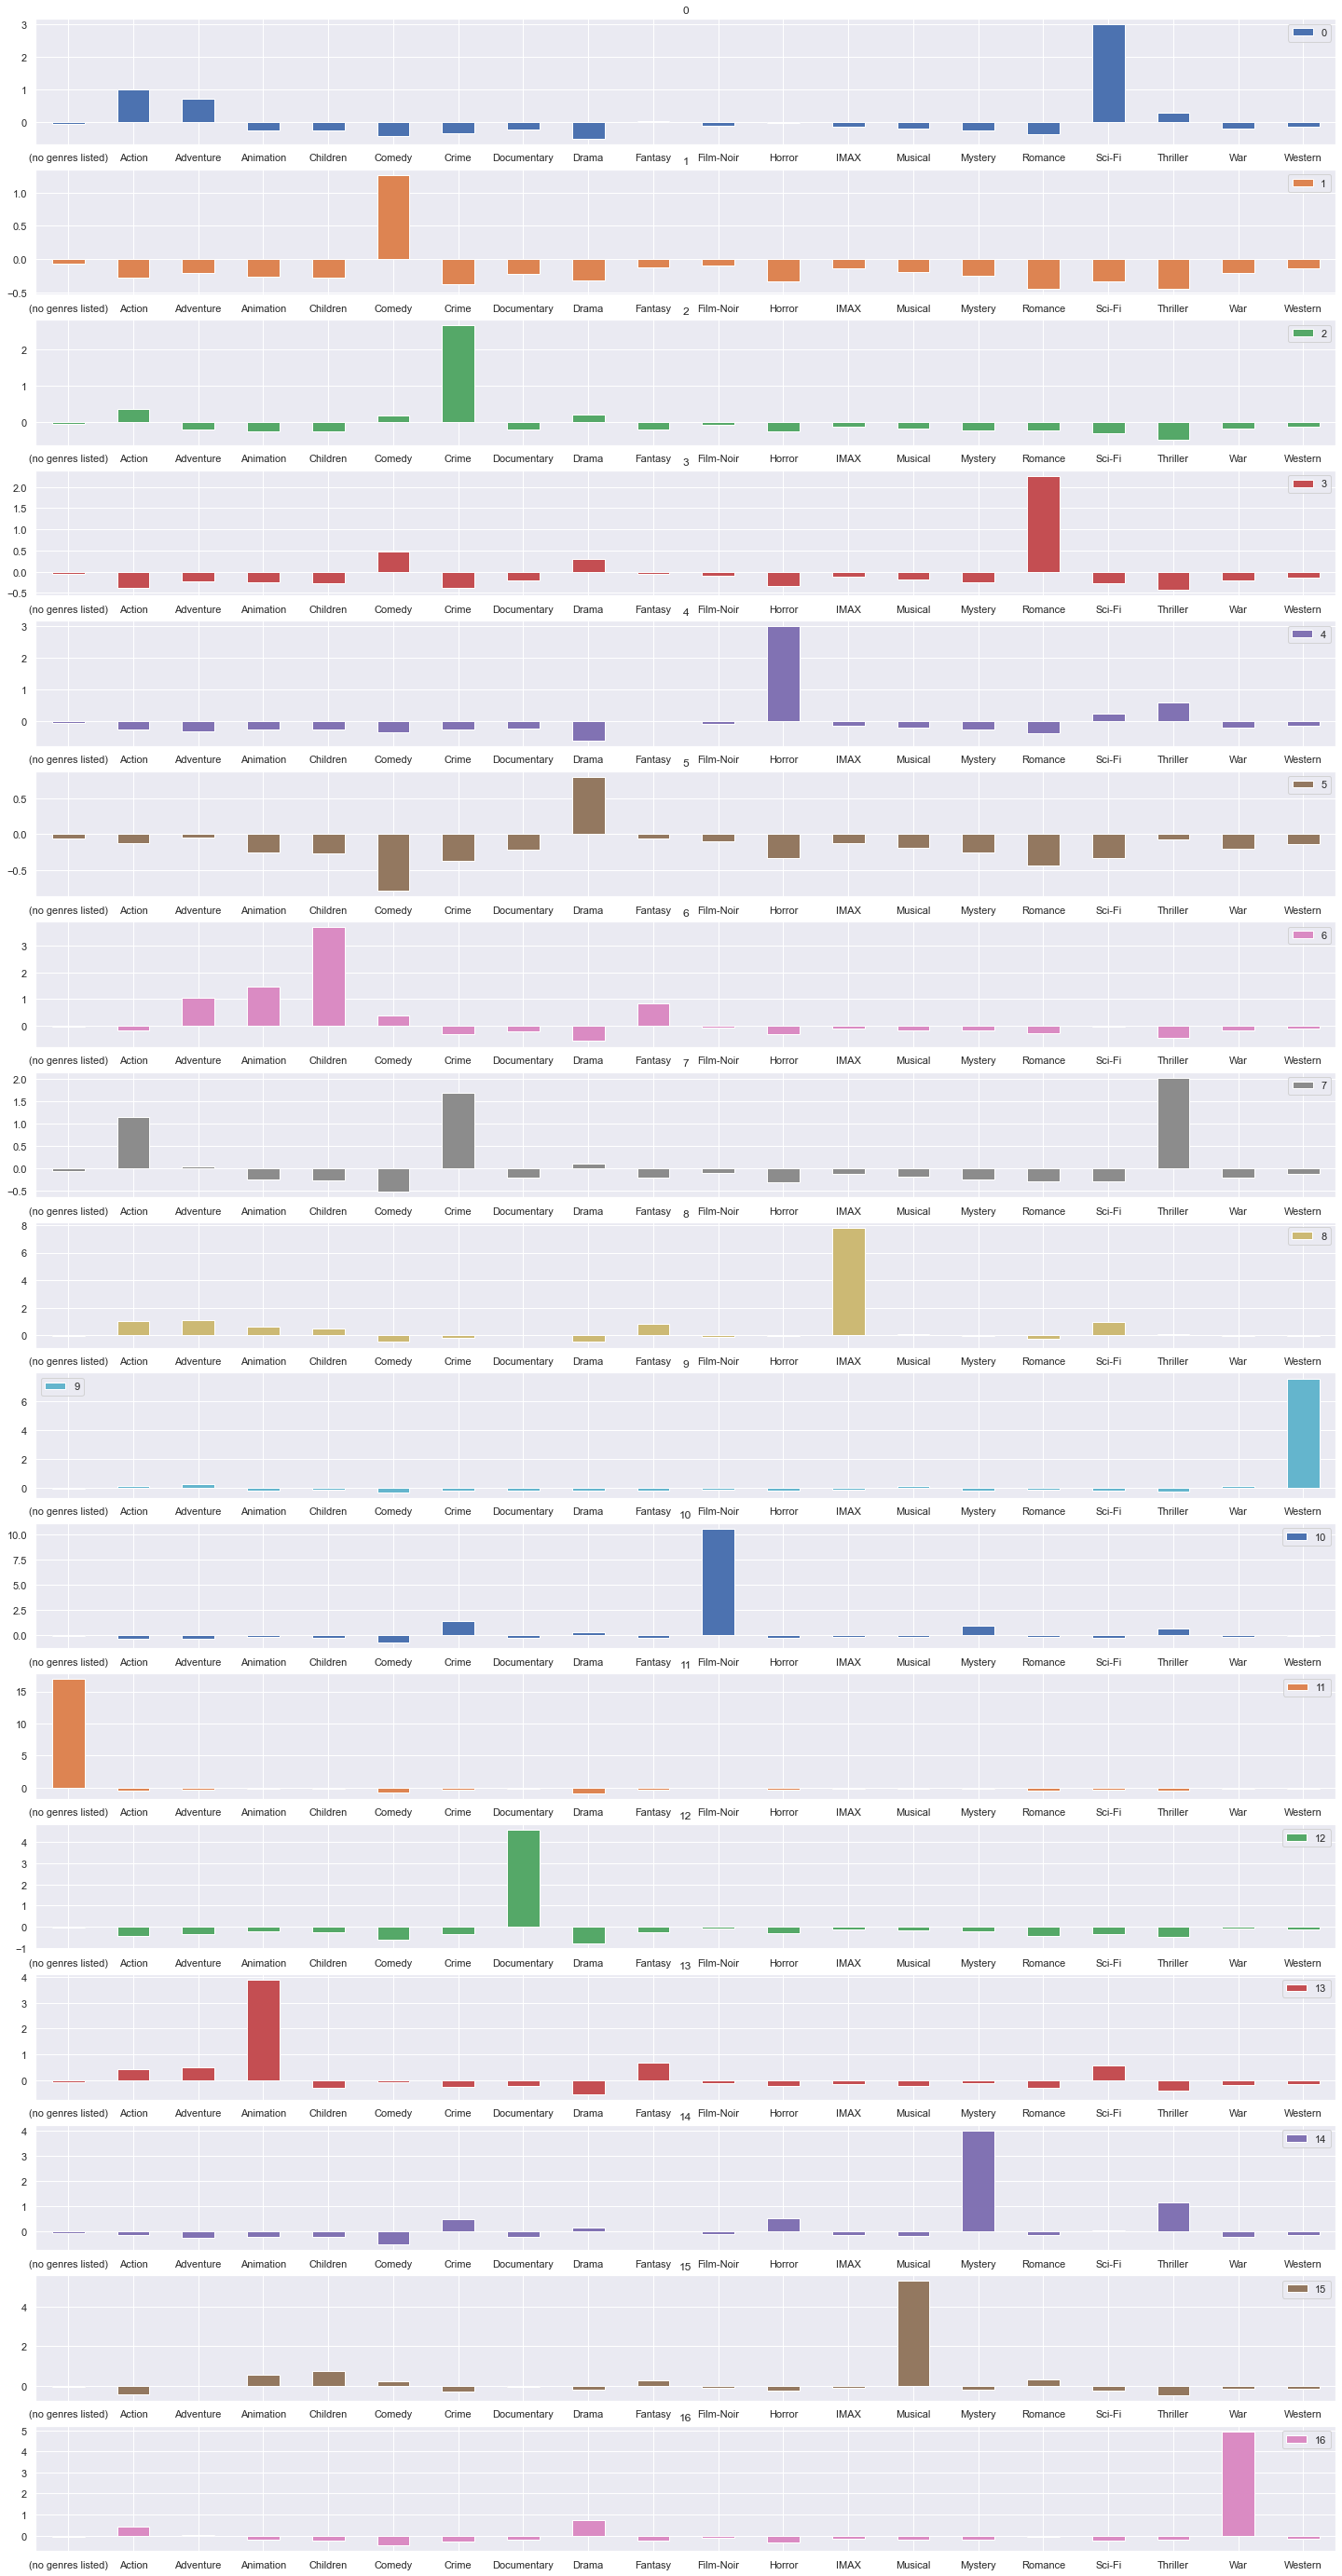

In [38]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

In [39]:
grupo = 16

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
2705,3628,Flying Tigers (1942),Action|Drama|Romance|War,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
747,979,Nothing Personal (1995),Drama|War,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1252,1663,Stripes (1981),Comedy|War,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4271,6235,Europa Europa (Hitlerjunge Salomon) (1990),Drama|War,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3531,4826,"Big Red One, The (1980)",Action|Adventure|Drama|War,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5448,26073,"Human Condition III, The (Ningen no joken III)...",Drama|War,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3618,4967,No Man's Land (2001),Drama|War,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4833,7215,To Have and Have Not (1944),Adventure|Drama|Romance|Thriller|War,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
4849,7248,"Suriyothai (a.k.a. Legend of Suriyothai, The) ...",Action|Adventure|Drama|War,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4708,7025,"Midnight Clear, A (1992)",Drama|War,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [40]:
from sklearn.cluster import AgglomerativeClustering

In [41]:
modelo = AgglomerativeClustering(n_clusters=17)
grupos = modelo.fit_predict(generos_escalados)
grupos

array([ 5, 14, 13, ...,  2,  5,  3], dtype=int64)

In [42]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[  5.1435184,  61.758804 ],
       [ 64.16105  ,  23.794952 ],
       [ 40.156574 ,   8.941632 ],
       ...,
       [ 10.790838 ,  -6.235704 ],
       [-47.10632  ,  33.399532 ],
       [-15.445524 ,  19.601906 ]], dtype=float32)

<AxesSubplot:>

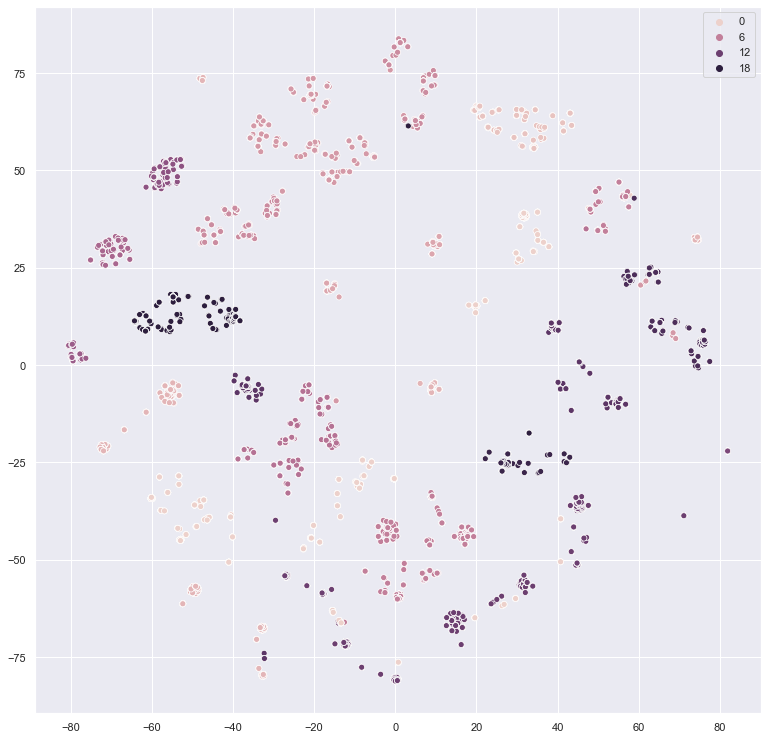

In [43]:
sns.scatterplot(x=visualizacao[:, 0],
               y=visualizacao[:, 1],
               hue=grupos)

In [44]:
from scipy.cluster.hierarchy import dendrogram, linkage

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>,
       <AxesSubplot:title={'center':'2'}>,
       <AxesSubplot:title={'center':'3'}>,
       <AxesSubplot:title={'center':'4'}>,
       <AxesSubplot:title={'center':'5'}>,
       <AxesSubplot:title={'center':'6'}>,
       <AxesSubplot:title={'center':'7'}>,
       <AxesSubplot:title={'center':'8'}>,
       <AxesSubplot:title={'center':'9'}>,
       <AxesSubplot:title={'center':'10'}>,
       <AxesSubplot:title={'center':'11'}>,
       <AxesSubplot:title={'center':'12'}>,
       <AxesSubplot:title={'center':'13'}>,
       <AxesSubplot:title={'center':'14'}>,
       <AxesSubplot:title={'center':'15'}>,
       <AxesSubplot:title={'center':'16'}>], dtype=object)

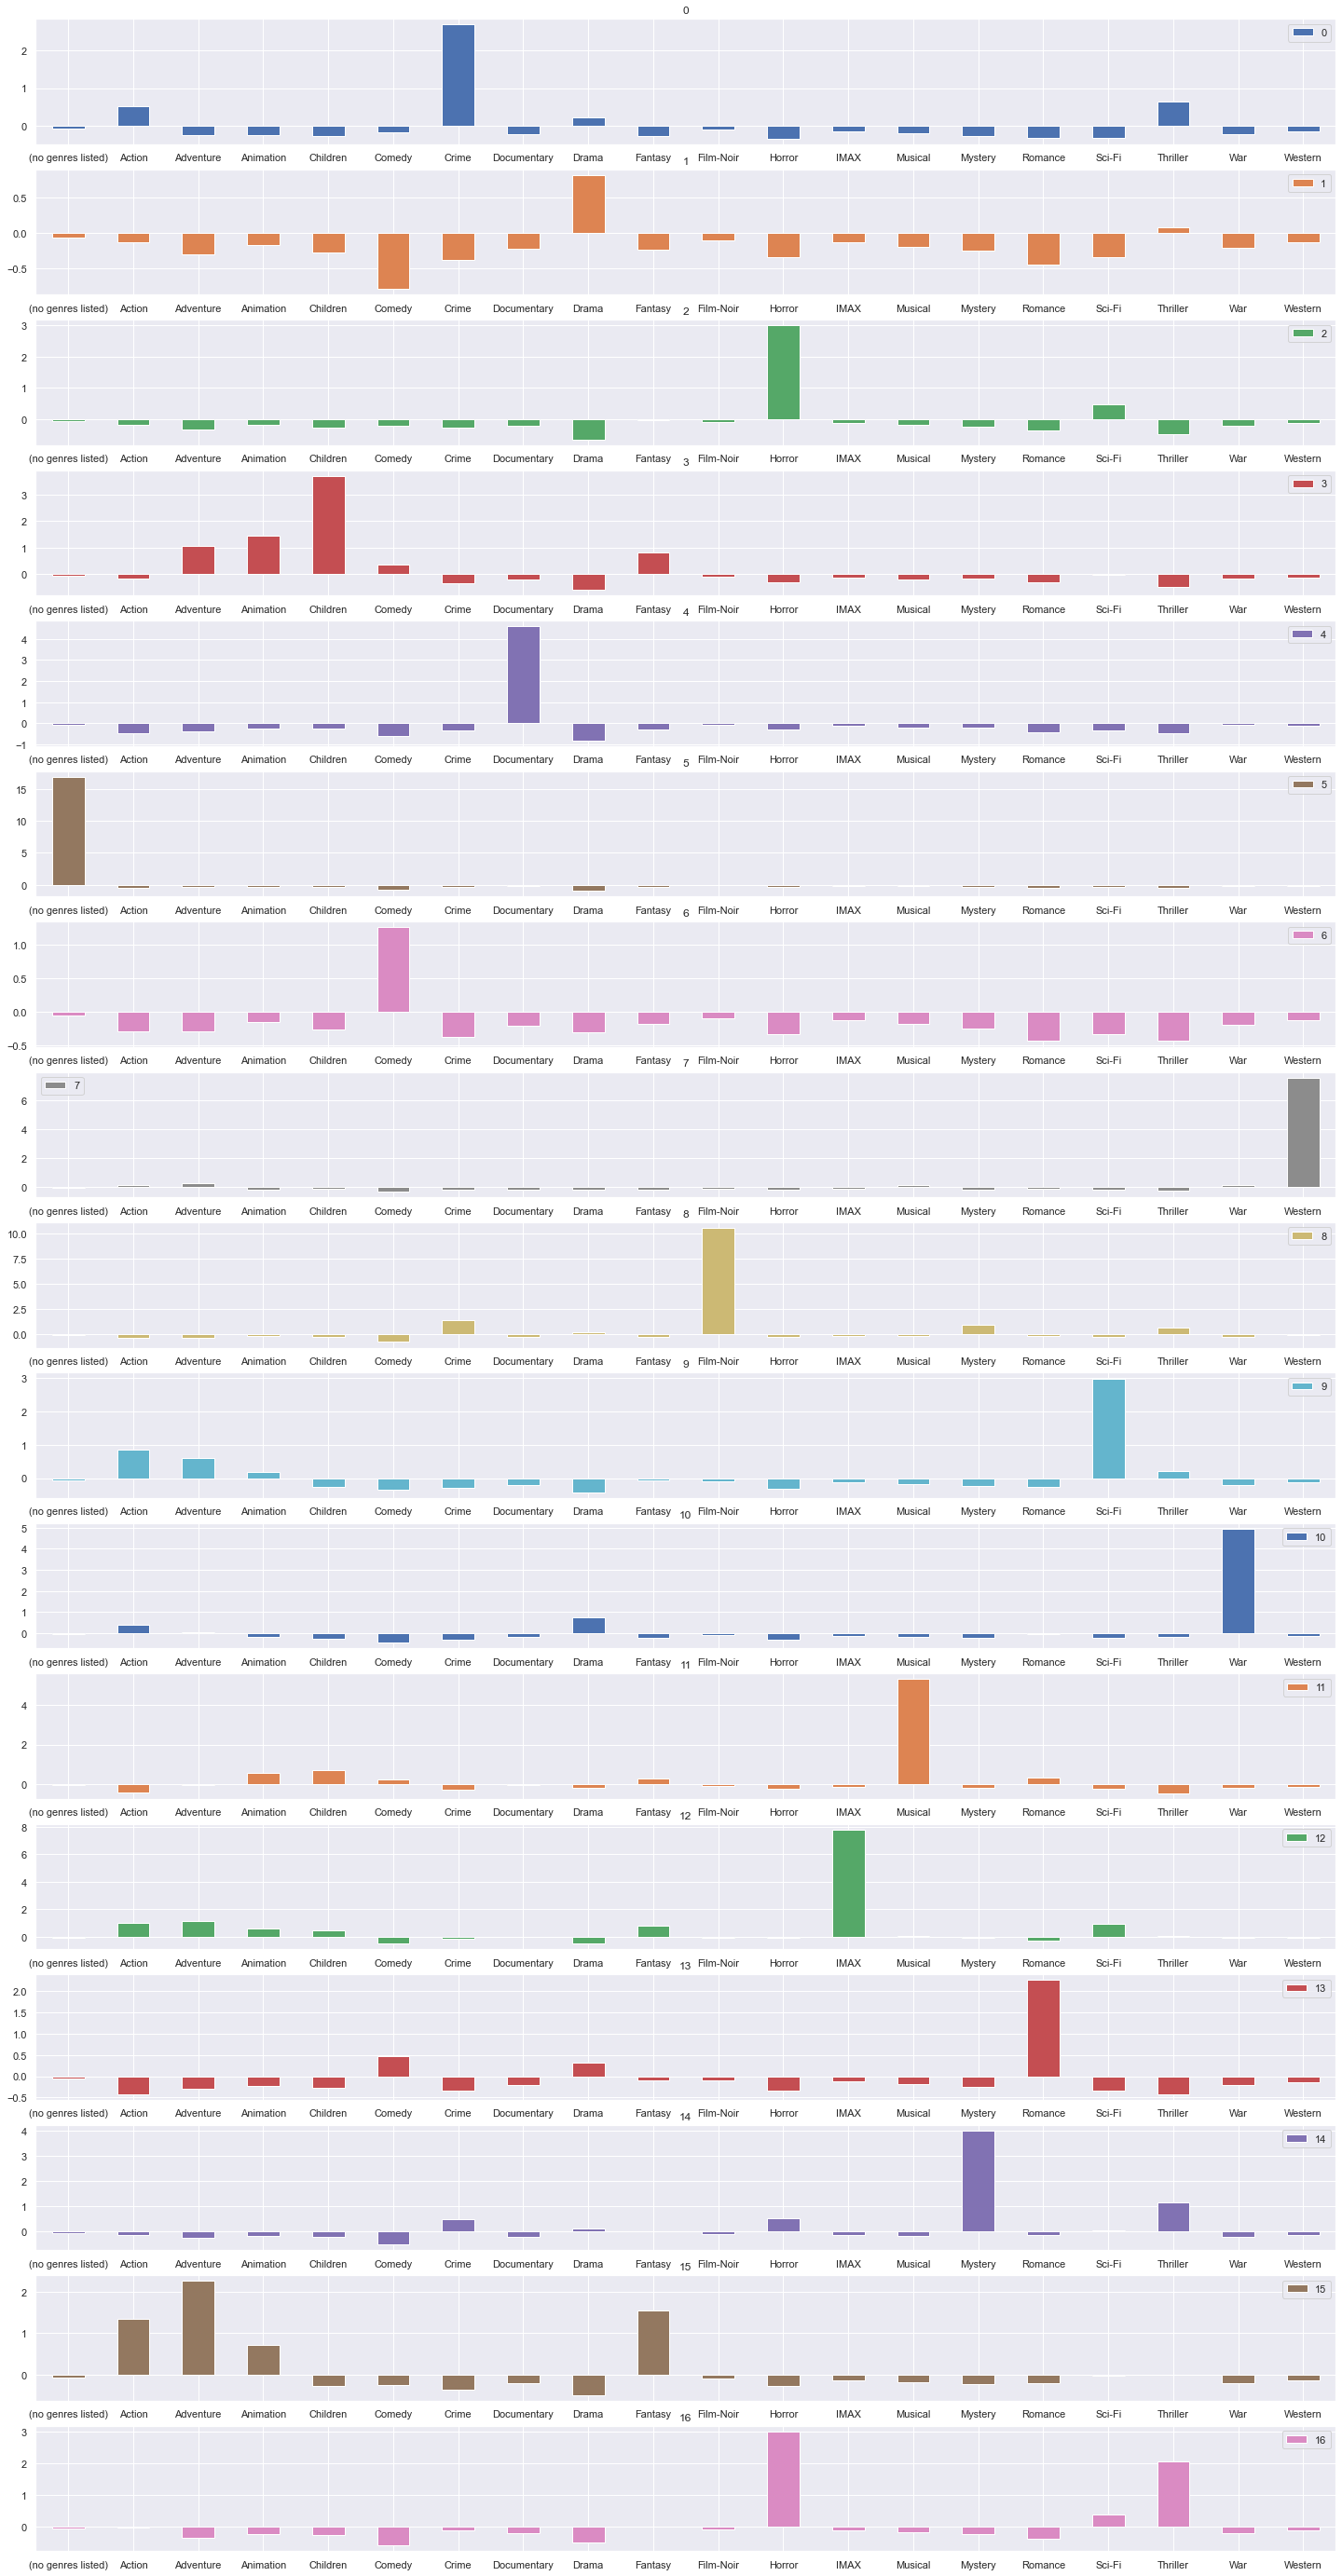

In [45]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

In [46]:
matriz_de_distancia = linkage(grupos)
matriz_de_distancia

array([[ 1.        ,  6.        ,  2.40771001,  2.        ],
       [ 2.        , 16.        ,  2.56931542,  2.        ],
       [13.        , 17.        ,  2.88479544,  3.        ],
       [ 0.        , 19.        ,  3.28837395,  4.        ],
       [18.        , 20.        ,  3.75053034,  6.        ],
       [15.        , 21.        ,  3.83353095,  7.        ],
       [ 9.        , 22.        ,  3.83834888,  8.        ],
       [ 3.        , 23.        ,  4.59856736,  9.        ],
       [14.        , 24.        ,  4.63764154, 10.        ],
       [ 4.        , 25.        ,  5.13295246, 11.        ],
       [10.        , 26.        ,  5.22402951, 12.        ],
       [11.        , 27.        ,  5.80556077, 13.        ],
       [ 7.        , 28.        ,  7.84288438, 14.        ],
       [12.        , 29.        ,  8.15229344, 15.        ],
       [ 8.        , 30.        , 10.8164064 , 16.        ],
       [ 5.        , 31.        , 17.05822306, 17.        ]])

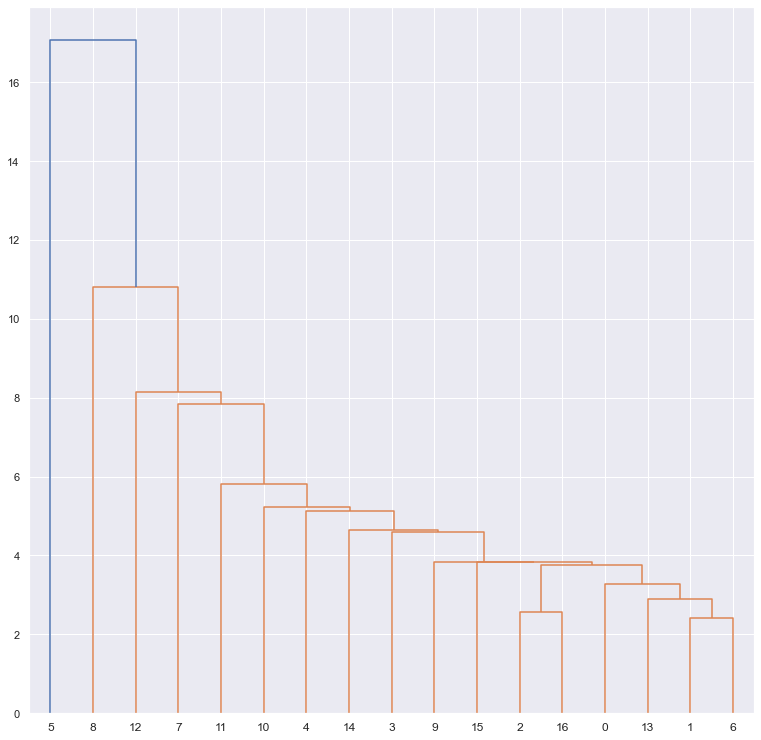

In [47]:
dendrograma = dendrogram(matriz_de_distancia)